# **CPP - Random Forest - No supervisado**

In [ ]:
# Predicción y Agrupación de Autos

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# 2. Descargar dataset desde GitHub
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Car-Prices-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# 3. --- PARTE SUPERVISADA ---
# Random Forest para predecir el precio de autos

# Variable objetivo
y = data["MSRP"]
X = data.drop(["MSRP", "Make", "Model"], axis=1)

# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Entrenar modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicciones
y_pred = modelo.predict(X_test)

In [ ]:
# Evaluación
print("\n=== Evaluación Random Forest ===")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


=== Evaluación Random Forest ===
R² Score: 0.9754968083284459
MAE: 3099.406190552335
RMSE: 7642.321116652396


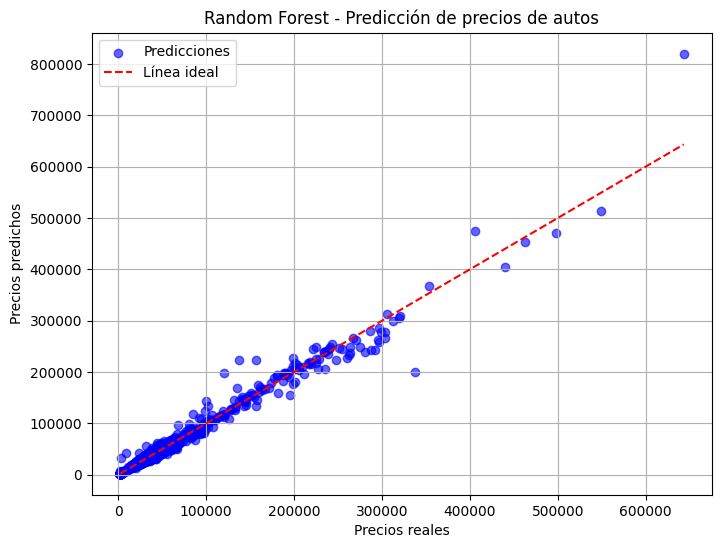

In [ ]:
# Visualización: reales vs predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Línea ideal")
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Random Forest - Predicción de precios de autos")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 4. --- PARTE NO SUPERVISADA ---
# KMeans para agrupar autos similares

# Usamos las mismas variables independientes (X)
X_clustering = X.copy()

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [ ]:
# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)  # X = dataset sin la columna "MSRP"

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

# Agregar clusters al dataset original
data["Cluster"] = clusters


=== Matriz de Evaluación (Precios reales vs predichos) ===
Precio Predicho  Muy barato  Barato  Medio  Caro  Muy caro
Precio Real                                               
Muy barato              351       0      1     1         0
Barato                    0     163     39     0         0
Medio                     0      22   1095    58         0
Caro                      0       0     65   398         7
Muy caro                  0       0      0     9        80


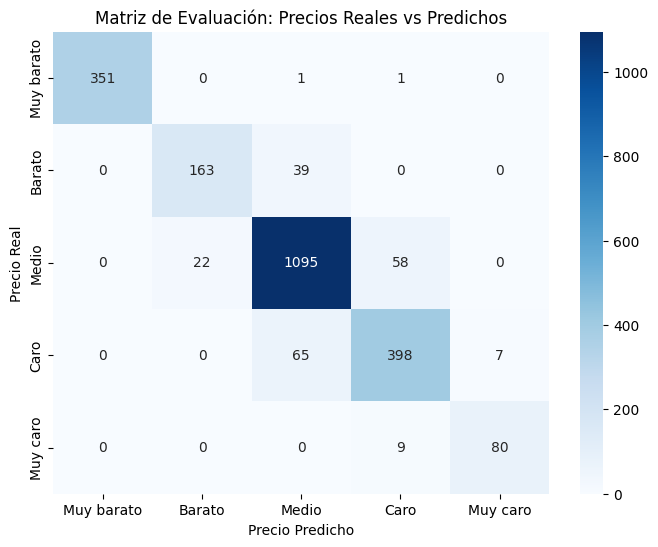

In [ ]:
# 5. Crear bins (rangos de precios)
bins = [0, 10000, 20000, 40000, 80000, 150000]
labels = ["Muy barato", "Barato", "Medio", "Caro", "Muy caro"]

y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# 6. Construir matriz de evaluación
matriz = pd.crosstab(y_test_binned, y_pred_binned, rownames=["Precio Real"], colnames=["Precio Predicho"])

print("\n=== Matriz de Evaluación (Precios reales vs predichos) ===")
print(matriz)

# 7. Visualización con heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Evaluación: Precios Reales vs Predichos")
plt.show()

# KNN - No supervisado

In [1]:
# KNN adaptado a aprendizaje no supervisado
# (usando grafo de vecinos + clustering espectral)

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# 2. Cargar dataset
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Car-Prices-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# 3. Preprocesamiento
# (a) Eliminar la variable de precio (no supervisado)
if "MSRP" in data.columns:
    data = data.drop("MSRP", axis=1)

# (b) Codificar categóricas
for col in data.select_dtypes(include="object").columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Imputar valores faltantes
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)  # moda para categóricas
    else:
        data[col].fillna(data[col].mean(), inplace=True)     # media para numéricas

# (c) Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

/tmp/ipython-input-1211359657.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)     # media para numéricas


In [4]:
# 4. Construir grafo de vecinos (KNN Graph)
knn_graph = kneighbors_graph(X_scaled, n_neighbors=10, include_self=False)

In [13]:
# 5. Clustering espectral directamente con vecinos más cercanos
spectral = SpectralClustering(
    n_clusters=4,                # número de clusters
    affinity="nearest_neighbors", # usa KNN internamente
    n_neighbors=10,              # número de vecinos
    random_state=42
)

clusters = spectral.fit_predict(X_scaled)
data["Cluster"] = clusters


print("\nDistribución de clusters:")
print(data["Cluster"].value_counts())

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Distribución de clusters:
Cluster
0    10238
1     1385
2      170
3      121
Name: count, dtype: int64


In [14]:
# 6. Evaluación del clustering
silhouette = silhouette_score(X_scaled, clusters)
calinski = calinski_harabasz_score(X_scaled, clusters)
davies = davies_bouldin_score(X_scaled, clusters)

print("\nMétricas de evaluación:")
print(f"Silhouette Score: {silhouette:.3f} (más cercano a 1 es mejor)")
print(f"Calinski-Harabasz Index: {calinski:.2f} (más alto es mejor)")
print(f"Davies-Bouldin Index: {davies:.3f} (más bajo es mejor)")


Métricas de evaluación:
Silhouette Score: -0.055 (más cercano a 1 es mejor)
Calinski-Harabasz Index: 58.82 (más alto es mejor)
Davies-Bouldin Index: 5.763 (más bajo es mejor)


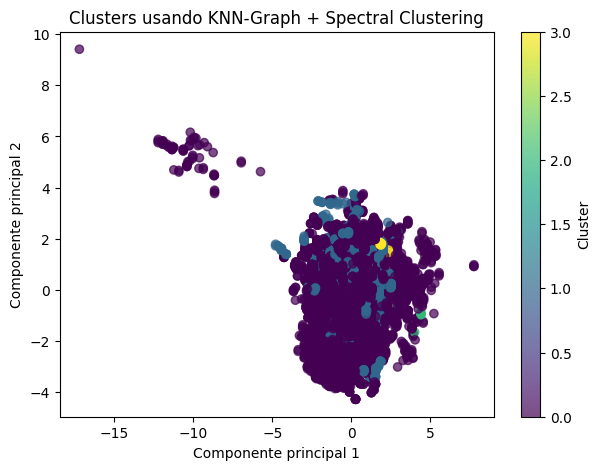

In [15]:
# 7. Visualización con PCA en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("Clusters usando KNN-Graph + Spectral Clustering")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label="Cluster")
plt.show()